In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter 
from wordcloud import WordCloud

In [2]:
df = pd.read_feather('./processed.feather')
print(f"Dataframe shape: {df.shape}")

Dataframe shape: (33311, 5)


In [3]:
df = pd.read_csv('./vnexpress_crawled.csv')
print(f"Dataframe shape: {df.shape}")

Dataframe shape: (33311, 5)


In [4]:
def show_word_cloud(col_name):
    lst_of_rows = list(df[col_name].str.split(" ").values)
    all_tokens = []
    for rows in lst_of_rows:
        all_tokens += rows

    word_counter = Counter(all_tokens)
    word_counter = dict(sorted(word_counter.items(), key=lambda x: x[1], reverse=True))

    wordcloud = WordCloud(width = 1600, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate_from_frequencies(word_counter)

    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()


df['title_len'] = df['Title'].str.split(' ').str.len()
df['description_len'] = df['Description'].str.split(' ').str.len()
df['content_len'] = df['Content'].str.split(' ').str.len()

## Overview

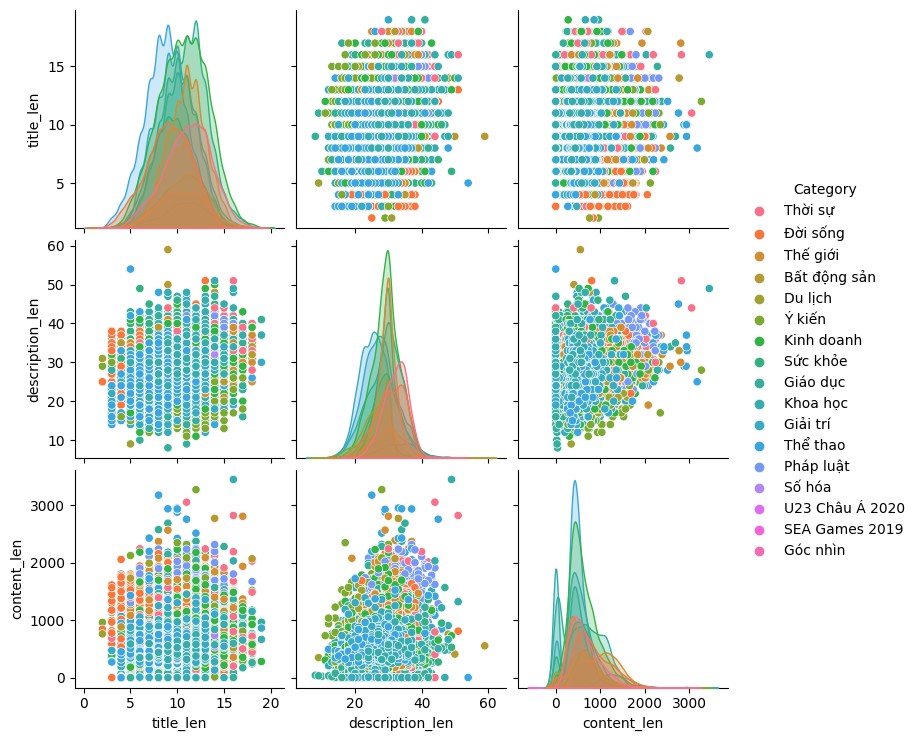

In [5]:
sns.pairplot(df, hue='Category')
plt.show()

## Word Cloud

### Title

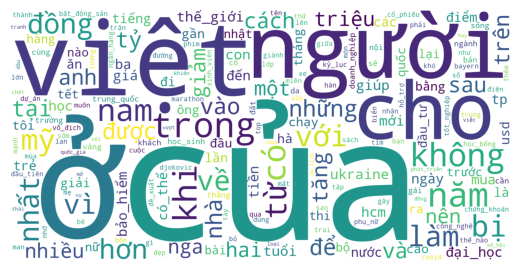

In [5]:
show_word_cloud('Title')

### Description

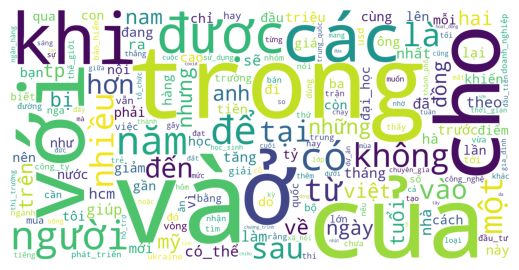

In [6]:
show_word_cloud('Description')

### Content

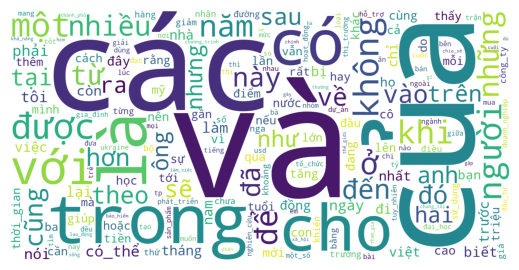

In [7]:
df = df.dropna()
show_word_cloud('Content')

## Labels Frequency

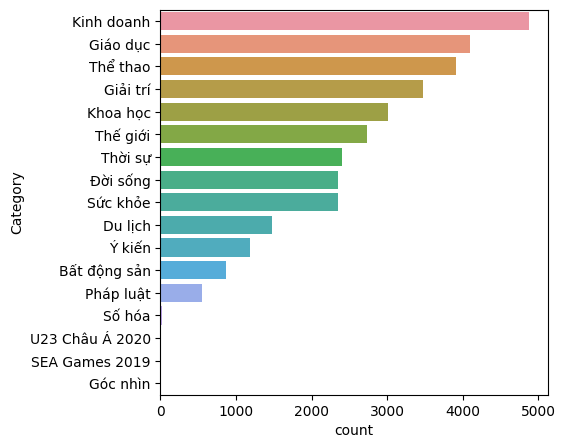

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, y='Category', orient='v', order=df['Category'].value_counts().index)
plt.show()

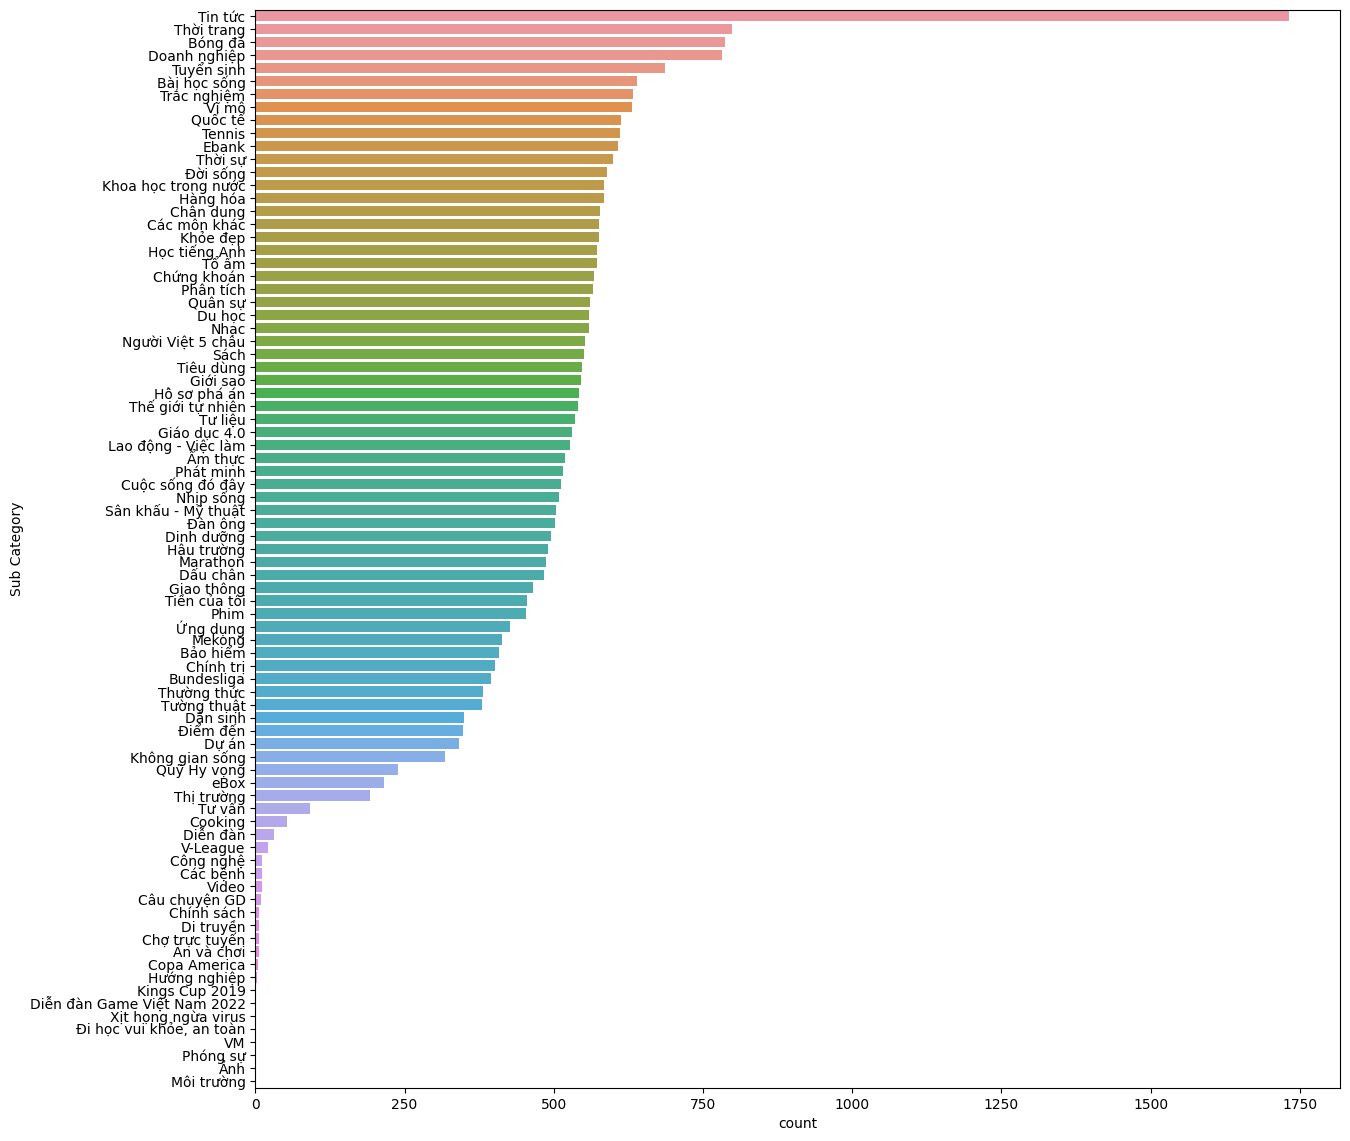

In [9]:
plt.figure(figsize=(14,14))
sns.countplot(data=df, y='Sub Category', orient='v', order=df['Sub Category'].value_counts().index)
plt.show()

## Text length

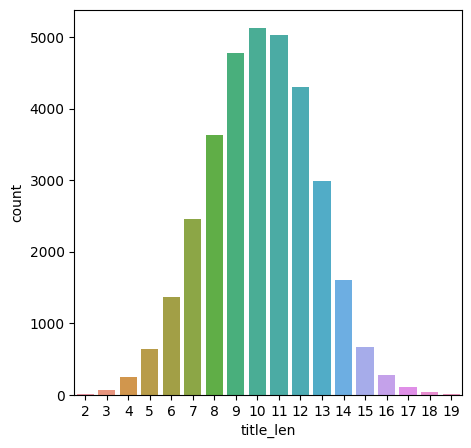

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='title_len')
plt.show()

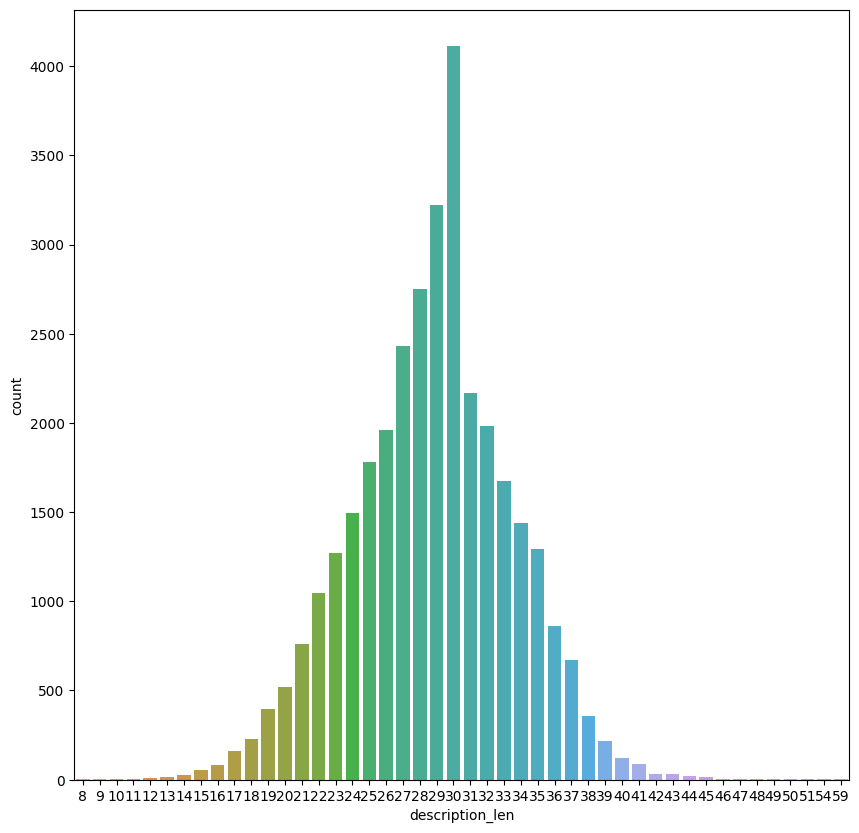

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='description_len')
plt.show()

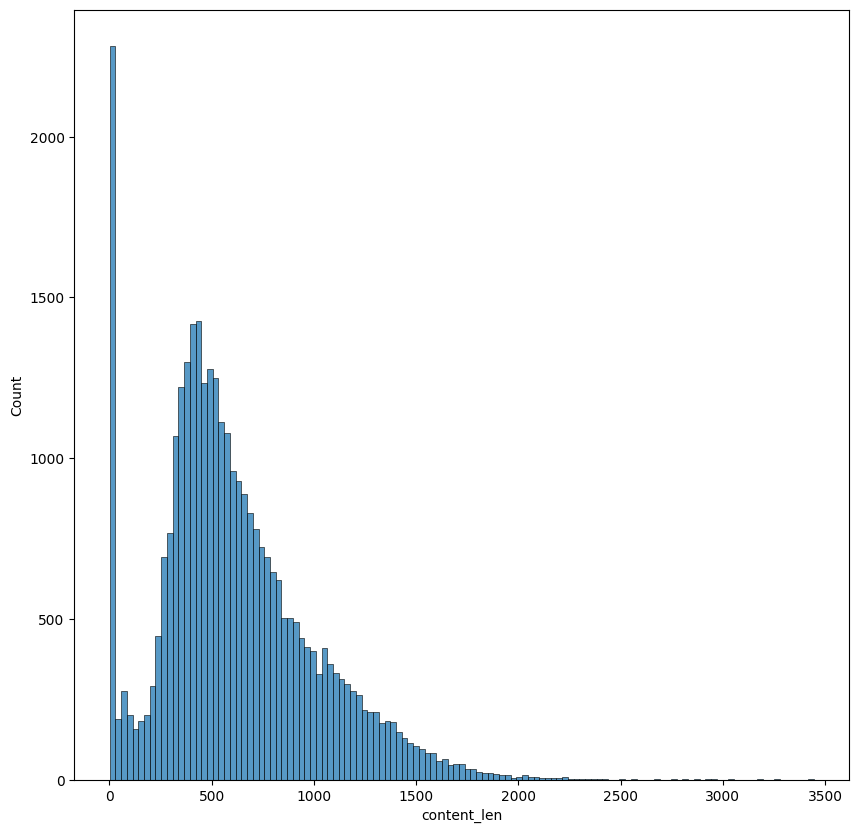

In [9]:
plt.figure(figsize=(10,10))
sns.histplot(data=df,x='content_len')
plt.show()